**Review**

Hello Caleb!

I'm happy to review your project today.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  Thank you so much for your feedbacks. I've split the cells into multiple so it's easier. Hopefully i got it right this time. Thank you!
</div>
  
First of all, thank you for turning in the project! You did a great job overall, but there are some small problems that need to be fixed before the project will be accepted. Let me know if you have any questions!


# Plot o' gold metal-model

In [1]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import ridge_regression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split




#Introduction: The purpose of this project is to find a way to model gold recovery from gold ore using model(s). The steps will be to prepare the data, perform data analysis, and to develop and train a model. Some key calculations/comparisons in this project are the recovery check, the concentrations comparisons, and the train set and test set feed size distribution comparison. The grand final is where the fSmape components will be predicted and the actual fSmape will be calculated.

In [2]:
train_dataset = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/gold_recovery_train.csv')
test_dataset = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/gold_recovery_test.csv')
source_dataset = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/gold_recovery_full.csv')

1.1 Open the files and look into the data

In [3]:
train_dataset.shape

(16860, 87)

In [4]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [5]:
train_dataset.duplicated().sum()

0

In [6]:
train_dataset.isna().sum()

date                                            0
final.output.concentrate_ag                    72
final.output.concentrate_pb                    72
final.output.concentrate_sol                  370
final.output.concentrate_au                    71
                                             ... 
secondary_cleaner.state.floatbank5_a_level     85
secondary_cleaner.state.floatbank5_b_air       85
secondary_cleaner.state.floatbank5_b_level     84
secondary_cleaner.state.floatbank6_a_air      103
secondary_cleaner.state.floatbank6_a_level     85
Length: 87, dtype: int64

In [7]:
train_dataset = train_dataset.fillna(method='ffill')

train_dataset.isna().sum()

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

In [8]:
test_dataset.shape

(5856, 53)

In [9]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [10]:
test_dataset.duplicated().sum()


0

In [11]:
test_dataset.isna().sum()

date                                            0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        40
rougher.input.feed_size                        22
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_sulfate             257


In [12]:
test_dataset = test_dataset.fillna(method='ffill')

test_dataset.isna().sum()

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

In [13]:
source_dataset.shape

(22716, 87)

In [14]:
source_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [15]:
source_dataset.duplicated().sum()

0

In [16]:
source_dataset.isna().sum()

date                                            0
final.output.concentrate_ag                    89
final.output.concentrate_pb                    87
final.output.concentrate_sol                  385
final.output.concentrate_au                    86
                                             ... 
secondary_cleaner.state.floatbank5_a_level    101
secondary_cleaner.state.floatbank5_b_air      101
secondary_cleaner.state.floatbank5_b_level    100
secondary_cleaner.state.floatbank6_a_air      119
secondary_cleaner.state.floatbank6_a_level    101
Length: 87, dtype: int64

In [17]:
source_dataset = source_dataset.fillna(method='ffill')

source_dataset.isna().sum()

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

1.2 recovery calculation check(cells 7-12)

In [18]:
train_slice = train_dataset['rougher.output.recovery']

y_true = train_slice[0:6]

y_true

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
5    88.156912
Name: rougher.output.recovery, dtype: float64

In [19]:
recovery_calc_check = (train_dataset['rougher.output.concentrate_au']* (train_dataset['rougher.input.feed_au']-
                       train_dataset['rougher.output.tail_au']))/(train_dataset['rougher.input.feed_au'] * 
                        (train_dataset['rougher.output.concentrate_au']-train_dataset['rougher.output.tail_au']))*100

In [20]:
y_pred = recovery_calc_check[0:6]

y_pred

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
5    88.156912
dtype: float64

In [21]:
def calc_MAE_fn(dataset_val, calc_check_val):
    print(mean_absolute_error(dataset_val, calc_check_val))
    

In [22]:
calc_MAE_fn(y_true , y_pred) 

7.105427357601002e-15


Recovery calculation check findings: The mean absolute error between the pre-calculated rougher.output.recovery value from the dataset and the calculated value from the formula using individual data points is so low, that we can comfortably say that the feature values were calculated correctly.

<div class="alert alert-block alert-success">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

Good job!
  
</div>

1.3 Analyze the missing features from the test set in relation to the training set, list them and their types

In [23]:
missing_features = set(train_dataset.columns) - set(test_dataset.columns)


# Print out the missing features and their types
for feature in missing_features:
    print(f"Feature: {feature}, Type: {train_dataset[feature].dtype}")
    
print(len(missing_features))
#These are the features not available in the test set

Feature: secondary_cleaner.output.tail_sol, Type: float64
Feature: primary_cleaner.output.tail_au, Type: float64
Feature: rougher.output.concentrate_au, Type: float64
Feature: rougher.output.tail_sol, Type: float64
Feature: primary_cleaner.output.concentrate_au, Type: float64
Feature: rougher.calculation.au_pb_ratio, Type: float64
Feature: secondary_cleaner.output.tail_au, Type: float64
Feature: primary_cleaner.output.concentrate_ag, Type: float64
Feature: rougher.output.recovery, Type: float64
Feature: rougher.output.tail_au, Type: float64
Feature: primary_cleaner.output.concentrate_pb, Type: float64
Feature: rougher.output.concentrate_pb, Type: float64
Feature: rougher.output.concentrate_sol, Type: float64
Feature: final.output.recovery, Type: float64
Feature: final.output.tail_ag, Type: float64
Feature: rougher.calculation.floatbank11_sulfate_to_au_feed, Type: float64
Feature: final.output.concentrate_au, Type: float64
Feature: primary_cleaner.output.tail_ag, Type: float64
Feature: 

<div class="alert alert-block alert-success">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

Correct
  
</div>

1.4 Perform Data Preprocessing 
Update: This section has been moved to earlier cells so as to be completed before the data was used for the recovery calculation check.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

Why did you use zero to fill NaNs? What is the logic behind this?
    
When you work with ordered data there is a better way to fill NaNs. What is the closest value for the time T? The value from time T-1. Agree? You can use it to fill all the NaNs. Method fillna() has such functionality. Just read the documentation to find out how to use it.
    
So, please, fix it
  
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

Interpolation uses not only past observations but also the future ones. So, it's not suitbale. Please, read the documentation for the fillna() method and find the argument which help to fill NaNs in a way I explained above.
  
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V3</b> <a class="tocSkip"></a>

Thank you!
  
</div>

2.1 Take into account how concentrations of metals change with each purification stage

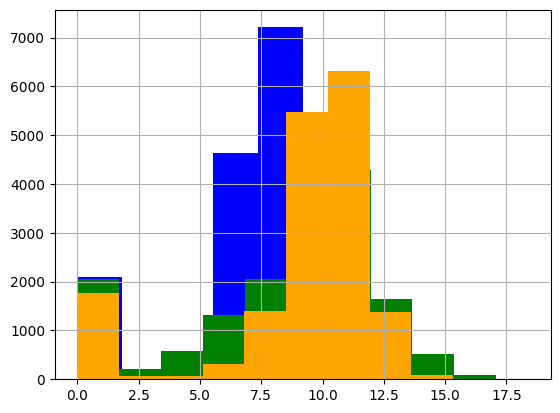

In [24]:
rougher_output_concentrate_lead = train_dataset['rougher.output.concentrate_pb'].hist(color = 'blue')

primary_cleaner_output_concentrate_lead = train_dataset['primary_cleaner.output.concentrate_pb'].hist(color = 'green')

final_lead = train_dataset['final.output.concentrate_pb'].hist(color = 'orange')

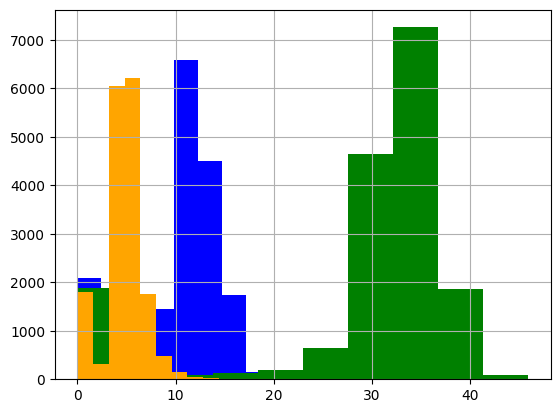

In [25]:
#silver concentrations during purification stage
rougher_output_concentrate_silver = train_dataset['rougher.output.concentrate_ag'].hist(color ='blue')

primary_cleaner_output_concentrate_silver = train_dataset['primary_cleaner.output.concentrate_au'].hist(color = 'green')
 
final_silver = train_dataset['final.output.concentrate_ag'].hist(color='orange')


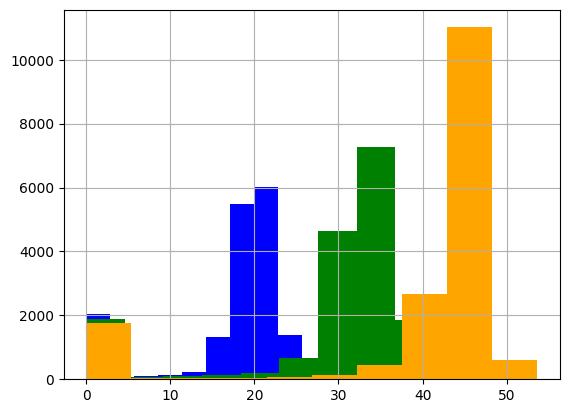

In [26]:
#gold concentrations during the purification stage

rougher_output_concentrate_gold = train_dataset['rougher.output.concentrate_au'].hist(color ='blue')
#1st stage cleaner process
primary_cleaner_output_concentrate_gold = train_dataset['primary_cleaner.output.concentrate_au'].hist(color = 'green')
# not necessary primary_cleaner.output.tail_au = train_dataset['primary_cleaner.output.tail_au '].hist()

# not required secondary_cleaner_output_tail_gold= train_dataset['secondary_cleaner.output.tail_au'].hist() 
 
final_gold = train_dataset['final.output.concentrate_au'].hist(color = 'orange')
#these are the residues #rougher_output_tail_au = train_dataset['rougher.output.tail_au'].hist()

#Im thinking these are all the relevant levels to check, after the flotation stage is complete

2.1 Conclusion: 'The change of concentrations of metals during the purification stage'

As you would expect, the concentration of gold gets higher after each stage. Silver increases dramatically from the first stage to the second, and then drops off significantly at the third stage. There is much overlap for lead throughout all stages. The initial amout is similar to silver for the beginning stage, but the concentration doesnt change dramatically like it does for the other two metals when the ore is purified.


<div class="alert alert-block alert-success">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

Well done!
  
</div>

2.2 Compare the feed particle size distributions in the training set and in the test set


(array([1.51694823e-01, 6.02445153e-01, 2.47565951e-01, 1.16154893e-02,
        1.56028960e-03, 1.73365512e-04, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.73365512e-04]),
 array([ 5.6500001 ,  6.63500009,  7.62000008,  8.60500007,  9.59000006,
        10.57500005, 11.56000004, 12.54500003, 13.53000002, 14.51500001,
        15.5       ]),
 <BarContainer object of 10 artists>)

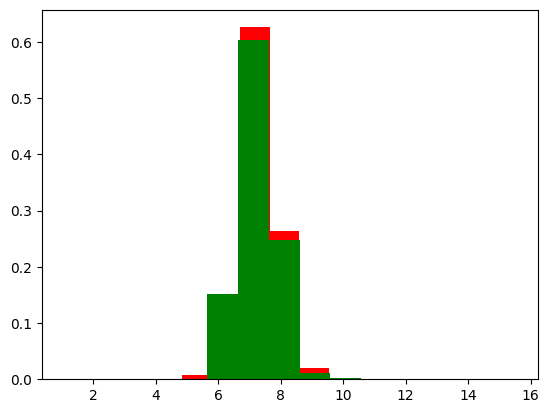

In [27]:
plt.hist(train_dataset['primary_cleaner.input.feed_size'], color='red', density = True)
plt.hist(test_dataset['primary_cleaner.input.feed_size'], color = 'green', density = True)

(array([8.86019620e-03, 1.15322053e-02, 3.86314570e-04, 1.00155629e-04,
        1.43079470e-05, 1.43079470e-05, 3.57698676e-06, 2.14619206e-05,
        3.57698676e-06, 1.07309603e-05]),
 array([4.63687988e-02, 4.77862792e+01, 9.55261895e+01, 1.43266100e+02,
        1.91006010e+02, 2.38745921e+02, 2.86485831e+02, 3.34225741e+02,
        3.81965652e+02, 4.29705562e+02, 4.77445473e+02]),
 <BarContainer object of 10 artists>)

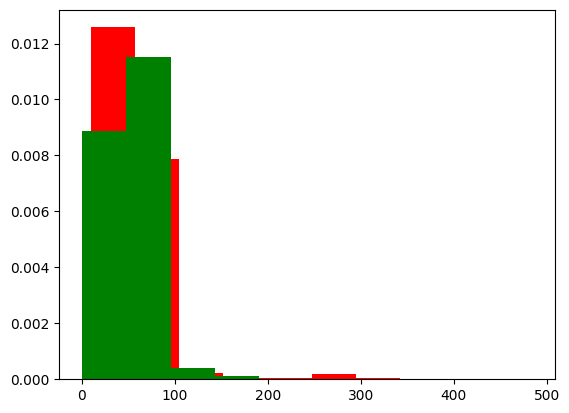

In [28]:
plt.hist(train_dataset['rougher.input.feed_size'],color='r', density = True)

plt.hist(test_dataset['rougher.input.feed_size'],color='g', density = True) 

2.2 Conclusion: How do the particle size distributions differ? If they vary significantly, the model evaluation will be incorrect.

Interpretation: The distributions' overlap each other proportionally, the model evaluation should be accurate.

Update: When normalized using the density parameter, the primary_cleaner_feed_size from the training and the test set appear to mirror each other. The rougher_input_feed_size for the training set appears to have outliers between the 200 and 350 mark. Despite the small number of outliers, the distribution overlap is significant with minimal variation, and the model evaluation should be correct. 

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

Train and test data have different number of observations. When you need to compare distributions with a different number of observations you should plot normalized histograms to avoid dependence on the number of observation
  
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

Good job!
  
</div>

2.3 Consider the total concentrations of all substances at different stages. Do you notice any abnormal values in the total distributions?


raw feed stage total distribution


rougher_input_feed_pb_concentration = train_dataset['rougher.input.feed_pb']

rougher_input_feed_silver_concentration = train_dataset['rougher.input.feed_ag']

rougher_input_feed_gold_concentration = train_dataset['rougher.input.feed_au']
rougher_pm_distribution = sum(rougher_input_feed_silver_concentration,rougher_input_feed_gold_concentration)
rougher_input_feed_distribution = sum(rougher_pm_distribution, rougher_input_feed_pb_concentration)

plt.hist(rougher_input_feed_distribution)

In [29]:
train_dataset['rougher.input.feed_total_concentration'] =  (train_dataset['rougher.input.feed_pb'] + 
                                                           train_dataset['rougher.input.feed_ag'] + 
                                                           train_dataset['rougher.input.feed_au'])

In [30]:
print(train_dataset['rougher.input.feed_total_concentration'].value_counts())

0.000000     1213
0.030000      373
20.606399      22
19.440479      10
20.618440       5
             ... 
28.449160       1
22.192416       1
26.935992       1
16.768064       1
30.192042       1
Name: rougher.input.feed_total_concentration, Length: 15224, dtype: int64


<AxesSubplot:>

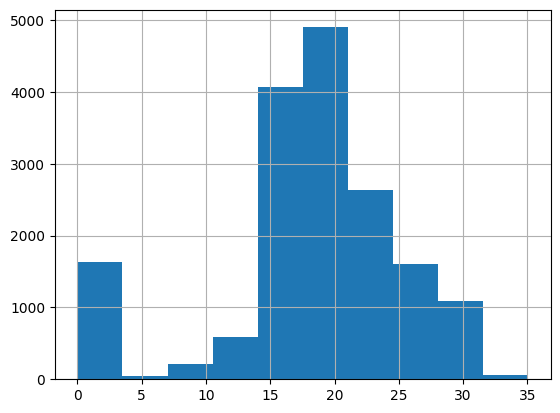

In [31]:
train_dataset['rougher.input.feed_total_concentration'].hist()

#rougher concentrate stage total distribution


rougher_output_feed_pb_concentration = train_dataset['rougher.output.concentrate_pb']

rougher_output_feed_silver_concentration = train_dataset['rougher.output.concentrate_ag']

rougher_output_feed_gold_concentration = train_dataset['rougher.output.concentrate_au']
rougher_pm_distribution = sum(rougher_output_feed_silver_concentration,rougher_output_feed_gold_concentration)
rougher_output_feed_distribution = sum(rougher_pm_distribution, rougher_output_feed_pb_concentration)

plt.hist(rougher_output_feed_distribution)

In [32]:
train_dataset['rougher.output.concetrate_total_concentration'] = (train_dataset['rougher.output.concentrate_pb'] +
                                                                 train_dataset['rougher.output.concentrate_ag'] +
                                                                  train_dataset['rougher.output.concentrate_au'])

In [33]:
print(train_dataset['rougher.output.concetrate_total_concentration'].value_counts())

0.000000     1547
0.030000      447
42.344688      22
34.327270      11
40.769592       7
             ... 
41.806092       1
38.828610       1
41.572055       1
39.712255       1
36.112257       1
Name: rougher.output.concetrate_total_concentration, Length: 14815, dtype: int64


<AxesSubplot:>

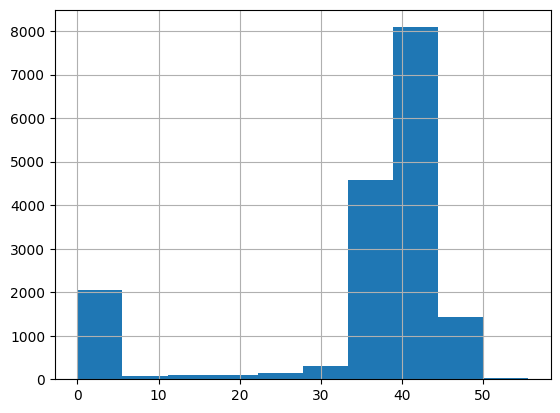

In [34]:
train_dataset['rougher.output.concetrate_total_concentration'].hist()

# final concentrate stage total distribution


#final_output_distribution = sum(final_output_lead_concentration,final_output_silver_concentration,final_output_gold_concentration)
final_output_lead_concentration  = train_dataset['final.output.concentrate_pb'] 
final_output_silver_concentration = train_dataset['final.output.concentrate_ag']
final_output_gold_concentration = train_dataset['final.output.concentrate_au']
final_pm_distribution = sum(final_output_silver_concentration,final_output_gold_concentration)
final_output_distribution = sum(final_pm_distribution, final_output_lead_concentration)

plt.hist(final_output_distribution)


In [35]:
train_dataset['final.output.concentrate_total_concentration'] = (train_dataset['final.output.concentrate_pb']+
                                                                 train_dataset['final.output.concentrate_ag']+
                                                                 train_dataset['final.output.concentrate_au'])
                                                                  

train_dataset['final.output.concentrate_total_concentration'].value_

In [36]:
df_train_filtered = train_dataset[train_dataset['final.output.concentrate_total_concentration'] > 0.03]
    
    
df_train_filtered['final.output.concentrate_total_concentration'].value_counts()

58.653404    22
58.026877    11
60.284920     8
59.935491     5
60.073814     5
             ..
61.714387     1
60.317276     1
60.305049     1
61.856183     1
57.897382     1
Name: final.output.concentrate_total_concentration, Length: 15079, dtype: int64

<AxesSubplot:>

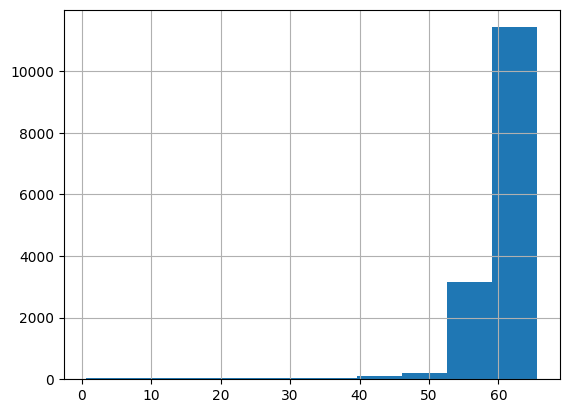

In [37]:
df_train_filtered['final.output.concentrate_total_concentration'].hist()

2.3 Conclusion: Describe findings and eliminate abnormanlites.

Interpretation: I am unsure if there are any abnormal values. There do not appear to be any outliers.

Update: After the concentrations are totaled for each stage, it becomes apparent that in each stage the data has outliers. In each histogram, the outliers near the origin make the otherwise normally distributed data unsymmetrical. To fix this, the data should be filtered.

Update #2: We end up with a new df, called df_train_filtered. It has the original data, plus the three total concentration totals with the total concentration for final.output.concentrate without the 0.000 values
Logic: It wouldn't make sense for total concentrations to be zero for a row that has all three metals combined, after the 
refining process takes place. Something is amiss in these rows.

In [38]:
df_train_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15136 entries, 0 to 16859
Data columns (total 90 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                15136 non-null  object 
 1   final.output.concentrate_ag                         15136 non-null  float64
 2   final.output.concentrate_pb                         15136 non-null  float64
 3   final.output.concentrate_sol                        15136 non-null  float64
 4   final.output.concentrate_au                         15136 non-null  float64
 5   final.output.recovery                               15136 non-null  float64
 6   final.output.tail_ag                                15136 non-null  float64
 7   final.output.tail_pb                                15136 non-null  float64
 8   final.output.tail_sol                               15136 non-null  float64


   threshold = 0.5  # Adjust based on your needs
   condition1 = (train_dataset['rougher.input.feed_pb'] < (2 - threshold)) | (train_dataset['rougher.input.feed_pb'] > (2 + threshold))
   train_dataset = train_dataset[condition1]

   threshold = 0.5  # Adjust based on your needs
   condition2 = (train_dataset['rougher.input.feed_ag'] < (2 - threshold)) | (train_dataset['rougher.input.feed_ag'] > (2 + threshold))
   train_dataset = train_dataset[condition2]

   threshold = 0.5  # Adjust based on your needs
   condition3 = (train_dataset['rougher.input.feed_au'] < (2 - threshold)) | (train_dataset['rougher.input.feed_au'] > (2 + threshold))
   train_dataset = train_dataset[condition3]


rougher_input_feed_pb_concentration = train_dataset['rougher.input.feed_pb']

rougher_input_feed_silver_concentration = train_dataset['rougher.input.feed_ag']

rougher_input_feed_gold_concentration = train_dataset['rougher.input.feed_au']
rougher_pm_distribution = sum(rougher_input_feed_silver_concentration,rougher_input_feed_gold_concentration)
rougher_input_feed_distribution = sum(rougher_pm_distribution, rougher_input_feed_pb_concentration)

plt.hist(rougher_input_feed_distribution)

   threshold = 1.25  # Adjust based on your needs
   condition1 = (train_dataset['rougher.output.concentrate_pb'] < (2.5 - threshold)) | (train_dataset['rougher.output.concentrate_pb'] > (2.5 + threshold))
   train_dataset = train_dataset[condition1]
  
   condition2 = (train_dataset['rougher.output.concentrate_ag'] < (2.5 - threshold)) | (train_dataset['rougher.output.concentrate_ag'] > (2.5 + threshold))
   train_dataset = train_dataset[condition2]

   condition3 = (train_dataset['rougher.output.concentrate_au'] < (2.5 - threshold)) | (train_dataset['rougher.output.concentrate_au'] > (2.5 + threshold))
   train_dataset = train_dataset[condition3]

rougher_output_feed_pb_concentration = train_dataset['rougher.output.concentrate_pb']

rougher_output_feed_silver_concentration = train_dataset['rougher.output.concentrate_ag']

rougher_output_feed_gold_concentration = train_dataset['rougher.output.concentrate_au']
rougher_pm_distribution = sum(rougher_output_feed_silver_concentration,rougher_output_feed_gold_concentration)
rougher_output_feed_distribution = sum(rougher_pm_distribution, rougher_output_feed_pb_concentration)

plt.hist(rougher_output_feed_distribution)

   threshold = 1.25  # Adjust based on your needs
   condition1 = (train_dataset['final.output.concentrate_pb'] < (63.75 - threshold)) | (train_dataset['final.output.concentrate_pb'] > (63.75 + threshold))
   train_dataset = train_dataset[condition1]
  
   condition2 = (train_dataset['final.output.concentrate_ag'] < (63.75 - threshold)) | (train_dataset['final.output.concentrate_ag'] > (63.75 + threshold))
   train_dataset = train_dataset[condition2]

   condition3 = (train_dataset['final.output.concentrate_au'] < (63.75 - threshold)) | (train_dataset['final.output.concentrate_au'] > (63.75 + threshold))
   train_dataset = train_dataset[condition3]

final_output_lead_concentration  = train_dataset['final.output.concentrate_pb'] 
final_output_silver_concentration = train_dataset['final.output.concentrate_ag']
final_output_gold_concentration = train_dataset['final.output.concentrate_au']
final_pm_distribution = sum(final_output_silver_concentration,final_output_gold_concentration)
final_output_distribution = sum(final_pm_distribution, final_output_lead_concentration)

plt.hist(final_output_distribution)

filtering the data changes where the mean is centered and I'm not sure thats a good thing, or if possibly its fine and its just that the scale just changed, due to the removal of outliers.

Update: Now the data is filtered, also new distributions have been calculated and graphed and the underlying data has been improved.(I hope)

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

1. This task is about total concentrations. You don't have total concentrations in the dataset and so you need to calcualte them. You need just to sum up concentrations of all metals on the parcituclar stage and then to plot the histogram for this stage. The same thing you need to do for all 3 stages.
2. When you plot the histogram for the total concentration, you will see a peak near zero. Is it possible to have near zero total concentration at least on one stage? It seems no. So, you need to filter the data and remove such observations.
  
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

You need to filter the data using total concentrations. To do it, it's better to create columns with total concentrations in the dataset. It's even simpler than to calculate sum using a function sum() as you did. Also you need to filter rows with peaks near zero at least in one total concentration and nothing more.
    
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V3</b> <a class="tocSkip"></a>

1. This task is not complete. You need to plot 3 histograms here. One histograms for each total concentration.
2. You should update your filters and remove rows with total concentrations 0.03 because these values are too different compared to the rest ones.
    
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V4</b> <a class="tocSkip"></a>
    
I see a filter only for the last total concentration. But you should filter the data by each total concentration

</div>

3.1 Write a function to calculate the final sMAPE value: (fsMAPE())

logic: 
Final sMAPE = sMAPE(rougher) which is defined as: predicted rougher concentrate recovery(rougher.output.recovery, multiplied by 25% and added to sMAPE(final) which is explained as: predicted final concentrate recovery(final.output.recovery) multiplied by 75%

In [39]:
#code:

import numpy as np

def smape(target, pred):
    N = len(target)
    epsilon = 1e-10  # Small constant to prevent division by zero
    smape_value = (
        (1 / N)
        * np.sum(2 * np.abs(pred - target) / (np.abs(target) + np.abs(pred) + epsilon))
        * 100
    )
    return smape_value

def smape_han(actual, pred):
 
    numerator = np.abs(pred - actual)
    denominator = np.abs(actual) + np.abs(pred) / 2
    return 100 * np.mean(numerator / denominator)






def fsmape(target, pred):
    if target.ndim == 1:
        target = target.reshape(-1,2)
    if pred.ndim == 1:
        pred = pred.reshape(-1,2)

    # Access columns for roughed and final predictions
    rougher_smape = smape(target[:, 0], pred[:, 0])
    final_smape = smape(target[:, 1], pred[:, 1])

    # Calculate weighted smape
    fsmape_value = (0.25 * rougher_smape) + (0.75 * final_smape)
    return fsmape_value
# Example usage:
# model1 = LinearRegression()
# model1.fit(train_features, train_target)
# prediction1 = model1.predict(test_features)
# result = fsmape(test_target, prediction1)

Intermediary step: Data preparation for models

source_dataset['day'] = source_dataset['date'].dt.day
source_dataset['month'] = source_dataset['date'].dt.month
source_dataset['year'] = source_dataset['date'].dt.year

In [40]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 90 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16860 non-null  float64
 2   final.output.concentrate_pb                         16860 non-null  float64
 3   final.output.concentrate_sol                        16860 non-null  float64
 4   final.output.concentrate_au                         16860 non-null  float64
 5   final.output.recovery                               16860 non-null  float64
 6   final.output.tail_ag                                16860 non-null  float64
 7   final.output.tail_pb                                16860 non-null  float64
 8   final.output.tail_sol                               16860 non-null  float64


#steps to change int columns to float
from sklearn.preprocessing import OrdinalEncoder


# Your initial dataframe
#churn_df = pd.read_csv('path_to_Churn.csv')

# The columns you want to encode
columns_to_encode = ['day', 'month', 'year']

# Initialize the OrdinalEncoder
encoder = OrdinalEncoder()

# Fit and transform the specified columns
encoded_columns = encoder.fit_transform(source_dataset[columns_to_encode])

# Create a DataFrame from the encoded columns
encoded_df = pd.DataFrame(encoded_columns, columns=columns_to_encode, index = source_dataset.index)

# Drop the original non-encoded columns
source_dataset = source_dataset.drop(columns=columns_to_encode, axis=1)

# Concatenate the original dataframe with the encoded columns
source_df_ordinal = pd.concat([source_dataset, encoded_df], axis=1)

# Now, source_df_ordinal should have the encoded values in place of the original columns.

source_df_ordinal.info()

3.2 Train different models, pick the best model and test it using the test sample.

In [41]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5856 non-null   float64
 2   primary_cleaner.input.depressant            5856 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5856 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5856 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5856 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5856 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5856 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5856 non-null   float64
 10  primary_clea

In [42]:
df_train_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15136 entries, 0 to 16859
Data columns (total 90 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                15136 non-null  object 
 1   final.output.concentrate_ag                         15136 non-null  float64
 2   final.output.concentrate_pb                         15136 non-null  float64
 3   final.output.concentrate_sol                        15136 non-null  float64
 4   final.output.concentrate_au                         15136 non-null  float64
 5   final.output.recovery                               15136 non-null  float64
 6   final.output.tail_ag                                15136 non-null  float64
 7   final.output.tail_pb                                15136 non-null  float64
 8   final.output.tail_sol                               15136 non-null  float64


In [43]:
target_df = source_dataset.loc[:,['date','rougher.output.recovery', 'final.output.recovery']]

target_df.head()

,date,rougher.output.recovery,final.output.recovery
0,2016-01-15 00:00:00,87.107763,70.541216
1,2016-01-15 01:00:00,86.843261,69.266198
2,2016-01-15 02:00:00,86.842308,68.116445
3,2016-01-15 03:00:00,87.226430,68.347543
4,2016-01-15 04:00:00,86.688794,66.927016


In [44]:
test_merged_for_targets = pd.merge(target_df , test_dataset, how ='outer', on ='date')

In [45]:
merged_1 = pd.merge(test_dataset['date'], source_dataset, on='date', how='left')

In [46]:
temp = merged_1[['date', 'final.output.recovery', 'rougher.output.recovery']]

In [47]:
merged_2 = pd.merge(test_dataset, temp, on='date', how='left')

In [48]:
merged_df = merged_2.dropna()

In [49]:
X= merged_df.iloc[:, 1:53]
y=merged_df['final.output.recovery']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f_smape= smape(y_test,y_pred)
f_smape

7.621208601139301

In [50]:
X= merged_df.iloc[:, 1:53]
y=merged_df['rougher.output.recovery']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r_smape= smape(y_test,y_pred)
r_smape

6.870336057276987

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V4</b> <a class="tocSkip"></a>
    
You shouldn't use train_test_split function here or somewhere else in this project. You have a file with train data and a file with test data. You should use this datasets. So, the data was already splitted for you. The only one purpose why you need to merge test data with the full data is to extract targest for the test data.

</div>

In [51]:
def final_smape(rougher, final):
    fSMAPE= (.25 * rougher) +(.75 * final)

    return fSMAPE

In [52]:
final_smape(r_smape, f_smape)

7.433490465173723

In [53]:
columns_to_drop = set(df_train_filtered.columns)-set(test_merged_for_targets)

columns_to_drop

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_total_concentration',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.input.feed_total_concentration',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concetrate_total_c

In [54]:
train_features_with_targets= df_train_filtered.drop(columns_to_drop, axis =1 )

train_features_with_targets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15136 entries, 0 to 16859
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        15136 non-null  object 
 1   final.output.recovery                       15136 non-null  float64
 2   primary_cleaner.input.sulfate               15136 non-null  float64
 3   primary_cleaner.input.depressant            15136 non-null  float64
 4   primary_cleaner.input.feed_size             15136 non-null  float64
 5   primary_cleaner.input.xanthate              15136 non-null  float64
 6   primary_cleaner.state.floatbank8_a_air      15136 non-null  float64
 7   primary_cleaner.state.floatbank8_a_level    15136 non-null  float64
 8   primary_cleaner.state.floatbank8_b_air      15136 non-null  float64
 9   primary_cleaner.state.floatbank8_b_level    15136 non-null  float64
 10  primary_cl

In [55]:
test_merged_for_targets = test_merged_for_targets.dropna() #I hope this acceptable since the NANs came from the merge

test_merged_for_targets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5856 entries, 5521 to 17208
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   rougher.output.recovery                     5856 non-null   float64
 2   final.output.recovery                       5856 non-null   float64
 3   primary_cleaner.input.sulfate               5856 non-null   float64
 4   primary_cleaner.input.depressant            5856 non-null   float64
 5   primary_cleaner.input.feed_size             5856 non-null   float64
 6   primary_cleaner.input.xanthate              5856 non-null   float64
 7   primary_cleaner.state.floatbank8_a_air      5856 non-null   float64
 8   primary_cleaner.state.floatbank8_a_level    5856 non-null   float64
 9   primary_cleaner.state.floatbank8_b_air      5856 non-null   float64
 10  primary_

In [56]:
test_merged_for_targets['rougher.input.feed_au'].isna().sum()

0

In [57]:
df_train_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15136 entries, 0 to 16859
Data columns (total 90 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                15136 non-null  object 
 1   final.output.concentrate_ag                         15136 non-null  float64
 2   final.output.concentrate_pb                         15136 non-null  float64
 3   final.output.concentrate_sol                        15136 non-null  float64
 4   final.output.concentrate_au                         15136 non-null  float64
 5   final.output.recovery                               15136 non-null  float64
 6   final.output.tail_ag                                15136 non-null  float64
 7   final.output.tail_pb                                15136 non-null  float64
 8   final.output.tail_sol                               15136 non-null  float64


In [58]:
target = ['rougher.output.recovery', 'final.output.recovery']

source_features = set(source_dataset.columns) #because we merged with the soucre_dataset df
test_features = set(test_dataset.columns)# these are the only ones we can keep since they are the only existing ones

features_to_remove = source_features-test_features

features_to_remove



{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

In [59]:
df_full_test = test_dataset.merge(source_dataset, on='date', how='left')
df_full_train = df_train_filtered.merge(source_dataset, on = 'date', how = 'left')

In [60]:
#df_train_filtered = df_full_train.drop(columns=[col for col in features_to_remove if col in df_train_filtered.columns])

df_full_test = test_dataset.merge(source_dataset, on='date', how='left')

features_test = df_full_test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1) 

# Make sure to only include the target columns here
target_test = df_full_test[['rougher.output.recovery', 'final.output.recovery']]

df_full_train = df_train_final.merge(source_dataset, on = 'date', how = 'left')

#features = df_train_final.drop(columns=['rougher.output.recovery', 'final.output.recovery'],axis=1) 
#arget = df_train_final[['rougher.output.recovery', 'total.output.recovery']] 

test_merged_with_targets = pd.merge(train_dataset, test_dataset, on='mo', how='left')

test_merged_with_targets.info()

print(test_merged_with_targets.columns)

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

Sorry, I can't accept such solution:) You need to solve this task without manually listing all the columns to drop. In other words, you need to create the list with all the columns to drop with the code.
    
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V3</b> <a class="tocSkip"></a>

Good job!
    
</div>

 train_dataset_less_missing.reset_index(inplace=True)
 test_dataset.reset_index(inplace=True)

 merged_df = pd.merge(test_dataset, train_dataset_less_missing[['date', 'final.output.recovery']], on='date', how='left')

 print(merged_df['final.output.recovery'].isnull().sum())


test_merged_with_targets=test_merged_with_targets.fillna(method = 'ffill')

In [61]:
def change_date_to_datetime_and_make_separate_period_cols(dataset):
    dataset['date'] = pd.to_datetime(dataset['date'], format = '%Y-%m-%d')
    dataset['month'] = dataset['date'].dt.to_period('m')
    dataset['day'] = dataset['date'].dt.to_period('d')
    dataset['year'] = dataset['date'].dt.to_period('Y')

    dataset['month'] = dataset['month'].astype(int)
    dataset['day'] = dataset['day'].astype(int)
    dataset['year'] = dataset['year'].astype(int)
    
    

In [62]:
change_date_to_datetime_and_make_separate_period_cols(test_merged_for_targets)

In [63]:
test_merged_for_targets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5856 entries, 5521 to 17208
Data columns (total 58 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        5856 non-null   datetime64[ns]
 1   rougher.output.recovery                     5856 non-null   float64       
 2   final.output.recovery                       5856 non-null   float64       
 3   primary_cleaner.input.sulfate               5856 non-null   float64       
 4   primary_cleaner.input.depressant            5856 non-null   float64       
 5   primary_cleaner.input.feed_size             5856 non-null   float64       
 6   primary_cleaner.input.xanthate              5856 non-null   float64       
 7   primary_cleaner.state.floatbank8_a_air      5856 non-null   float64       
 8   primary_cleaner.state.floatbank8_a_level    5856 non-null   float64       
 9   prim

In [64]:
change_date_to_datetime_and_make_separate_period_cols(train_features_with_targets)

In [65]:
train_features_with_targets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15136 entries, 0 to 16859
Data columns (total 58 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        15136 non-null  datetime64[ns]
 1   final.output.recovery                       15136 non-null  float64       
 2   primary_cleaner.input.sulfate               15136 non-null  float64       
 3   primary_cleaner.input.depressant            15136 non-null  float64       
 4   primary_cleaner.input.feed_size             15136 non-null  float64       
 5   primary_cleaner.input.xanthate              15136 non-null  float64       
 6   primary_cleaner.state.floatbank8_a_air      15136 non-null  float64       
 7   primary_cleaner.state.floatbank8_a_level    15136 non-null  float64       
 8   primary_cleaner.state.floatbank8_b_air      15136 non-null  float64       
 9   primar

test_merged_with_targets['date'] = pd.to_datetime(test_merged_with_targets['date'], format = '%Y-%m-%d')
test_merged_with_targets['month'] = test_merged_with_targets['date'].dt.to_period('m')
test_merged_with_targets['day'] = test_merged_with_targets['date'].dt.to_period('d')
test_merged_with_targets['year'] =test_merged_with_targets['date'].dt.to_period('Y')

test_merged_with_targets['month'] =test_merged_with_targets['month'].astype(int)
test_merged_with_targets['day'] = test_merged_with_targets['day'].astype(int)
test_merged_with_targets['year'] = test_merged_with_targets['year'].astype(int)

In [66]:
test_merged_for_targets= test_merged_for_targets.drop('date',axis=1)
train_features_with_targets= train_features_with_targets.drop('date',axis=1)



    print(features_train.shape[1])
    print(features_test.shape[1])





features_test.shape




features_train.shape

common_columns = train_dataset.columns.intersection(test_dataset.columns)

features_train = features_train[common_columns]
features_test = features_test[common_columns]

test_dataset['final.output.recovery'] = train_dataset['final.output.recovery']

test_dataset['final.output.recovery'] = train_dataset_less_missing['final.output.recovery'].sample(5856, random_state = 12345) 

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

Sorry, I don't understnad. What happens here? You sampled random targets from train to use them in test? Never do this:) It doesn't make sense becasue random targets can't be real ones.
    
You have a full data where you have targets for the test data. You need to extract these targets. To do it, you need to use method merge() and the column with dates.
    
And don't forget that you have 2 targets in this project

</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V3</b> <a class="tocSkip"></a>

Fixed
    
</div>

test_dataset['final.output.recovery'].isna().sum()

test_dataset['final.output.recovery']=test_dataset['final.output.recovery'].interpolate(random_state= 12345)

test_dataset['final.output.recovery'].isna().sum()

test_dataset['final.output.recovery'] = test_dataset['final.output.recovery'].fillna(method = 'bfill')

test_dataset['final.output.recovery'].isna().sum()

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

All the NaNs should be filled in the beginning of this notebook with a method `fillna(method = 'ffill')`

</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V3</b> <a class="tocSkip"></a>

Fixed
    
</div>

test_dataset['date'] = pd.to_datetime(test_dataset['date'], format = '%Y-%m-%d')
test_dataset['month'] = test_dataset['date'].dt.to_period('m')
test_dataset['day'] = test_dataset['date'].dt.to_period('d')
test_dataset['year'] = test_dataset['date'].dt.to_period('Y')

test_dataset = test_dataset.drop('date', axis = 1)

test_dataset = test_dataset.drop(['level_0','index','final_output_recovery'], axis=1)

train_dataset_less_missing = train_dataset_less_missing.drop('index', axis = 1)

In [67]:
train_features_with_targets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15136 entries, 0 to 16859
Data columns (total 57 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   final.output.recovery                       15136 non-null  float64
 1   primary_cleaner.input.sulfate               15136 non-null  float64
 2   primary_cleaner.input.depressant            15136 non-null  float64
 3   primary_cleaner.input.feed_size             15136 non-null  float64
 4   primary_cleaner.input.xanthate              15136 non-null  float64
 5   primary_cleaner.state.floatbank8_a_air      15136 non-null  float64
 6   primary_cleaner.state.floatbank8_a_level    15136 non-null  float64
 7   primary_cleaner.state.floatbank8_b_air      15136 non-null  float64
 8   primary_cleaner.state.floatbank8_b_level    15136 non-null  float64
 9   primary_cleaner.state.floatbank8_c_air      15136 non-null  float64
 10  primary_cl

In [68]:
test_merged_for_targets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5856 entries, 5521 to 17208
Data columns (total 57 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rougher.output.recovery                     5856 non-null   float64
 1   final.output.recovery                       5856 non-null   float64
 2   primary_cleaner.input.sulfate               5856 non-null   float64
 3   primary_cleaner.input.depressant            5856 non-null   float64
 4   primary_cleaner.input.feed_size             5856 non-null   float64
 5   primary_cleaner.input.xanthate              5856 non-null   float64
 6   primary_cleaner.state.floatbank8_a_air      5856 non-null   float64
 7   primary_cleaner.state.floatbank8_a_level    5856 non-null   float64
 8   primary_cleaner.state.floatbank8_b_air      5856 non-null   float64
 9   primary_cleaner.state.floatbank8_b_level    5856 non-null   float64
 10  primary_

In [69]:



target_test_final = test_merged_for_targets['final.output.recovery']

target_test_rougher = test_merged_for_targets['rougher.output.recovery']

features_test_final = test_merged_for_targets.drop('final.output.recovery',axis=1)

features_test_rougher = test_merged_for_targets.drop('rougher.output.recovery',axis=1)

target_train_final = train_features_with_targets['final.output.recovery']

target_train_rougher = train_features_with_targets['rougher.output.recovery']

features_train_final = train_features_with_targets.drop('final.output.recovery', axis = 1)

features_train_rougher = train_features_with_targets.drop('rougher.output.recovery', axis = 1)

features_train = train_features_with_targets.drop(['final.output.recovery', 'rougher.output.recovery'], axis = 1)

features_train.info()

features_test = test_merged_for_targets.drop(['rougher.output.recovery', 'final.output.recovery'] ,axis=1)

# Example usage:
# model1 = LinearRegression()
# model1.fit(train_features, train_target)
# prediction1 = model1.predict(test_features)
# result = fsmape(test_target, prediction1)



<class 'pandas.core.frame.DataFrame'>
Int64Index: 15136 entries, 0 to 16859
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               15136 non-null  float64
 1   primary_cleaner.input.depressant            15136 non-null  float64
 2   primary_cleaner.input.feed_size             15136 non-null  float64
 3   primary_cleaner.input.xanthate              15136 non-null  float64
 4   primary_cleaner.state.floatbank8_a_air      15136 non-null  float64
 5   primary_cleaner.state.floatbank8_a_level    15136 non-null  float64
 6   primary_cleaner.state.floatbank8_b_air      15136 non-null  float64
 7   primary_cleaner.state.floatbank8_b_level    15136 non-null  float64
 8   primary_cleaner.state.floatbank8_c_air      15136 non-null  float64
 9   primary_cleaner.state.floatbank8_c_level    15136 non-null  float64
 10  primary_cl

Question: In the above cell, I separated the two targets and it dramatically impacted all models. Is that the correct way to do it? It made all the r2 values negative and they were low before but not negative.

In [70]:
model1=LinearRegression()
model1.fit(features_train_final, target_train_final)
lrf_predicted_final = model1.predict(features_test_final)
lrf_smape = smape(target_test_final, lrf_predicted_final)
print('Linear Regression Final')
print('smape=', lrf_smape )                 #I dont understand why the smape is so high here. It wasnt as high previously

Linear Regression Final
smape= 155.59692753349822


<div class="alert alert-block alert-danger">
<b>Reviewer's comment V4</b> <a class="tocSkip"></a>
    
To work with any linear model all the numerical features should be scaled. This can be the reason of such bad quality

</div>

In [71]:
model1=LinearRegression()
model1.fit(features_train_rougher, target_train_rougher)
lrr_predicted_rougher = model1.predict(features_test_rougher)
lrr_smape = smape(target_test_rougher, lrr_predicted_rougher)
print('Linear Regression Rougher')
print('smape=', lrr_smape )



Linear Regression Rougher
smape= 14.875925956961536


In [72]:
model2=RandomForestRegressor(n_estimators = 50, random_state=12345, max_depth = 8)
model2.fit(features_train_final, target_train_final)
rfrf_predicted_final = model2.predict(features_test_final)
rfrf_smape = smape(target_test_final, rfrf_predicted_final)
print('Random Forest Regression Final')
print('smape=', rfrf_smape )



Random Forest Regression Final
smape= 25.798971712554536


In [73]:
model2=RandomForestRegressor(n_estimators = 50, random_state=12345, max_depth = 8)
model2.fit(features_train_rougher, target_train_rougher)
rfrr_predicted_rougher = model2.predict(features_test_rougher)
rfrr_smape = smape(target_test_rougher, rfrr_predicted_rougher)
print('Random Forest Regression Rougher')
print('smape=', rfrr_smape )

Random Forest Regression Rougher
smape= 13.323904059494254


<div class="alert alert-block alert-danger">
<b>Reviewer's comment V3</b> <a class="tocSkip"></a>

The main metric of this project is sMAPE. So, you should use this metric instead of R2, MSE, RMSE and so on.If you want, you can calculate these metrics in addition to the sMAPE metric. But you can't replace sMAPE metric by any other ones.
    
</div>

model3=ridge_regression(features_test, target_test, alpha = 0.1)



print('Ridge Regression')
print('R2 =', r2)
print('MSE =', mse)
print('RMSE =', mse ** 0.5)


Logic: Since we are trying to predict a continuous value we will use a regression model.

Findings: The best one is the random forest regressor. It takes a little longer, but the calculated statistics are much better(lower mean squared error and RMSE and a considerably higher R2 value)

Update:I used the training data for all the steps since I dont have valid designated data. Random forest regressor is still the best model so I will find out how to use the test data on it and do it.

Update 2: I got the model to work with the training data using only the features from test, and added the targets to test so both the training dataset and the target dataset match now. Wondering If I can make the model work better in any way?

def final_smape(y_true_rougher, y_pred_rougher, y_true_final, y_pred_final):
   rougher_smape = smape(y_true_rougher, y_pred_rougher)
   final_smape = smape(y_true_final, y_pred_final)
   final = 0.25 * rougher_smape + 0.75 * final_smape
   return final

from sklearn.metrics import make_scorer
   
def custom_scorer(estimator, X, y):
    y_pred = estimator.predict(X)
    # Split y and y_pred into rougher and final true/predicted values
    y_true_rougher = target_test_rougher  # Placeholder for your rougher stage true values
    y_pred_rougher = rfrr_predicted_rougher  # Placeholder for your rougher stage predictions
    y_true_final = target_test_final  # Placeholder for your final stage true values
    y_pred_final = rfrf_predicted_final # Placeholder for your final stage predictions
   
    
    return final_smape(y_true_rougher, y_pred_rougher, y_true_final, y_pred_final)

scorer = make_scorer(custom_scorer, greater_is_better=False)

final_smape(target_test_rougher,rfrr_predicted_rougher,target_test_final,rfrf_predicted_final)

X=features_train
y= pd.DataFrame({ 'y_true_rougher': target_train_rougher,
                 'y_true_final': target_train_final})

y_train = pd.DataFrame({
       'y_true_rougher': target_train_rougher,
       'y_true_final': target_train_final})

y_test = pd.DataFrame({
        'y_true_rougher': target_test_rougher,
        'y_true_final': target_test_final
})

model = RandomForestRegressor(random_state=12345)
model.fit(features_train, y_train)  # Train the model with your data


features_train.info()

y_pred = model.predict(X)  # Use the trained model to make predictions
print(y_pred)  # Inspect the predictions to understand the output
   

def final_smape(y_true_rougher, y_pred_rougher, y_true_final, y_pred_final):
    rougher_smape = smape(y_true_rougher, y_pred_rougher)
    final_smape = smape(y_true_final, y_pred_final)
    final = 0.25 * rougher_smape + 0.75 * final_smape
    return final

In [74]:
#my_scorer = make_scorer(smape, greater_is_better=False)

In [75]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score


from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

def custom_scorer_final(estimator, X, y):
    y_pred = estimator.predict(X)
    y_pred_rougher = y_pred[:, 0]
    y_pred_final = y_pred[:, 1]

    y_true_rougher = y['y_true_rougher']
    y_true_final = y['y_true_final']

    return final_smape(y_true_rougher, y_pred_rougher, y_true_final, y_pred_final)
   

In [76]:
my_scorer = make_scorer(smape, greater_is_better=False)

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
}

for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring=my_scorer)
    print(f"{model_name} Mean sMAPE CV Score: {-cv_scores.mean()}")



Linear Regression Mean sMAPE CV Score: 9.551921481211656


from sklearn.model_selection import cross_val_score
   
model =RandomForestRegressor(random_state = 12345)

scorer = make_scorer(custom_scorer, greater_is_better=False)

#random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, 
                                      #n_iter=3, cv=3, scoring=scorer)
#random_search.fit(features_train, y_train)

scores = cross_val_score(model, X, y, cv=5, scoring=scorer)

#scores = cross_val_score(rougher_model, X, y , cv=5, scoring=custom_scorer)

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V3</b> <a class="tocSkip"></a>

All the code below is broken, so I can't check it
    
</div>

# Define the model

model = RandomForestRegressor(random_state=12345)

# Define the parameter distribution
param_dist = {
    'max_depth': [None, 5, 10,15],
    'n_estimators': randint(50,100),  # Randomly select n_estimators between 50 and 100
}

# Set up the randomized search
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=3, cv=3, scoring=my_scorer)

# Fit the random search
random_search.fit(features_train_rougher, target_train_rougher)

# Best parameters
print("Best parameters found: ", random_search.best_params_)
print("Best MSE: ", -random_search.best_score_)

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>
    
The main metric of this project is smape. So, you should use smape as `scoring` instead of mse. To do, you need to convert your smape function to the scorer using a function `make_scorer` from sklearn.

</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V3</b> <a class="tocSkip"></a>

1. Broken code
2. You can't just write `scoring='smape'` because in the sklearn there is no built it smape function. You should your custom smape scorer here.
    
</div>

#use the model to make predictions and use the predictions to carry out calculations
prediction_final= model_final.predict(features_test)

target_test = np.array(target_test)  #I had to change target test to an array since prediction_final is an numpy array


result = fsmape(target_test, prediction_final)
print('Random Forest Regression')

print('fSMAPE', result)

Logic: Train the model, and then test it using the test data.
    
Findings: The test data produced a slightly lower MSE and RMSE. The fSMAPE value is 9.42 on the test data which increased from approximately 3.14 when I ran it using the full dataset

Conclusion: I am a bit unsettled that the fsMAPE increased so much, and it is 8 higher then a sample post on discord. I'll appreciate any input and tips!

Update: The r2 value went negative and the fsmape decreased a little bit when using the original test and training data (less missing features). It got a little better when using the tuned hyper-parameters. Also the mse for the sanity check is lower than the model using the training and test data. Something is terribly wrong.

Update2: Using the Random Forest regressor the r2 is above zero now, and the fsmape is about 11.74 which is below the sanity checks fSmape value so I'm content with it. I still need to implement make_scorer

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

    
1. You don't need to create you own test data using train_test_split. You need to use the train and test data from correspoding data files.
2. In the model training you can use only features which are represented in the initial test data. You can't use other features because they will not be available in production.
3. You need to calculate metrics on test for the best model. To calculate metrics you need to know targets, right? You can find targets for the test data in the full data. You can use method merge and column date to extract these targets.
4. You need to tune hyperparameters at least for one model.
5. You need to do sanity check. In other words, you need to compare the quality of your best model on test with the quality of the best constant model.

  
</div>

The tripleten tutor gave me code to make the smape/make_scorer work and so I could complete cross validation, the given code is in lines 45-51 and 74-76. It employs train test split, but with only the features found in the test set as well as targets.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

    
1. You need to calculate metrics on test for the best model. To calculate metrics you need to know targets, right? You can find targets for the test data in the full data. You can use method merge and column date to extract these targets.
2. You have 2 targets in this project. Thus, you need to train separate model for different targets or you can train the models which predict two targets at once.

  
</div>

In [ ]:
from sklearn.dummy import DummyRegressor

# Create a baseline model that predicts the most frequent class
dummy_reg = DummyRegressor(strategy="mean")
dummy_reg.fit(X_train, y_train)
dummy_predictions = dummy_reg.predict(X_test)
dummy_smape = smape(y_test, dummy_predictions)
dummy_fsmape = smape(y_test,dummy_predictions)
print("Baseline Model smape (mean class):", dummy_smape)
prin
#I am unsure of how to get the fsmape to work but the dummy smape is nearly 3 units above the fsmape of the best model

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>
    
The main metric of this project is smape. So, you should use smape instead of mse.

</div>

Conlclusion for Zyfra: The model prototype at the middle of this project(RandomForestRegressor:Lines 49-52) has been deemed most efficientfor your needs of predicting the amount of gold ore. It has a fSMAPE result of 7.462, which when compared with a random predictor seems to be comforatably better at predicting Symmetric Mean Absolute Percentage Error